## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [91]:
# Chosen Questions: 1, 2, 3, 5
! git clone https://github.com/arya-rajesh-99/undergrad_ml_assignments
%run ./undergrad_ml_assignments/get_data.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fatal: destination path 'undergrad_ml_assignments' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Question 1 Response
1. If the target/outcome variable y is categorical then it is a classification and if it is numeric then it is a regression.
2. A confusion matrix evaluates fit and understand on whether predictions are good or bad. You can do this by cross-tabulating the true labels with predicted ones, and see if they align or not. It helps us understand the errors that a model makes.
3. Accuracy is the proportion of the cases did we predict correctly. The number of cases are summed up on the descending diagnol of the confusion matrix and divided by the total number of observations. It may not be sufficient because it can give misleading information for datasets that may not be balanced and cannot differentiate between false positives and false negatives.
4. Root mean squared error measures the distance from the true values to the predicted ones, weighted by sample size. It quantifies how far predictions are from true values and indicates larger errors more because it it squared error.
5. Overfitting is if the k is too low then the model is overly sensitive to a handful of data points. Underfitting is if the k is too high then the model averages over many observations and gives answers close to population proportions.
6. Train/Test split is relevant because we want to imagine how the model will perform in plausible situations that the model has not seen. The split allows for the training set to fit the model and the test to get an estimate on performance. So with this, the model can train using the training and test data to be balanced by using k.
7. Predicting a class label would allow for efficient interpretion and direct output, but prevents differentiation between predictions and loses uncertain values. Predicting a probability distribution takes uncertainty into account and is more trustworthy/specific, but is more complex and requires calibration.


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

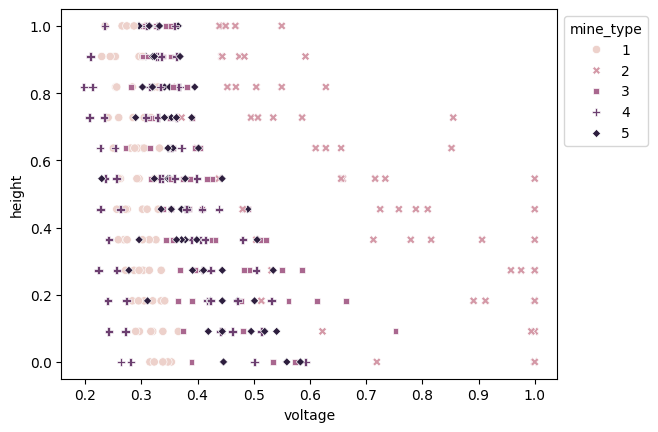

In [ ]:
### Question 2.1
landmines_df = pd.read_csv('./data/land_mines.csv')
landmines_df.head()
#describing tables
landmines_df.describe()
#summarizing mine_type
landmines_df['mine_type'].value_counts()
landmines_df['mine_type'].sort_index()
#summary of target value: takes integers values 1-5, no missing values
landmines_plot = sns.scatterplot(data=landmines_df,x='voltage',y='height',
                            hue='mine_type', style='mine_type')
sns.move_legend(landmines_plot, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
### Question 2.2
# Using min max to normalize and 50/50 train test split
# for mine type represented in both sets.

def MinMaxScaler(x):
  u = (x-min(x))/(max(x)-min(x))
  return u

y= landmines_df['mine_type']
ctrl_list = ['voltage', 'height', 'soil']
x = landmines_df.loc[:, ctrl_list]
u= x.apply(MinMaxScaler)
from sklearn.model_selection import train_test_split

u_train, u_test, y_train, y_test = train_test_split(u,y, test_size=0.5,stratify=y,
                                                    random_state=100)

169
Test accuracy for 3 neighbors is 0.46745562130177515; train accuracy for 3 neighbors is 0.6923076923076923
Test accuracy for 5 neighbors is 0.40236686390532544; train accuracy for 5 neighbors is 0.5976331360946746
Test accuracy for 7 neighbors is 0.40236686390532544; train accuracy for 7 neighbors is 0.5857988165680473
Test accuracy for 9 neighbors is 0.3905325443786982; train accuracy for 9 neighbors is 0.5384615384615384
Test accuracy for 11 neighbors is 0.3609467455621302; train accuracy for 11 neighbors is 0.5325443786982249
Test accuracy for 13 neighbors is 0.40236686390532544; train accuracy for 13 neighbors is 0.5088757396449705
Test accuracy for 15 neighbors is 0.39644970414201186; train accuracy for 15 neighbors is 0.5029585798816568
Test accuracy for 17 neighbors is 0.40828402366863903; train accuracy for 17 neighbors is 0.5029585798816568
Test accuracy for 19 neighbors is 0.40828402366863903; train accuracy for 19 neighbors is 0.4911242603550296
Test accuracy for 21 neig

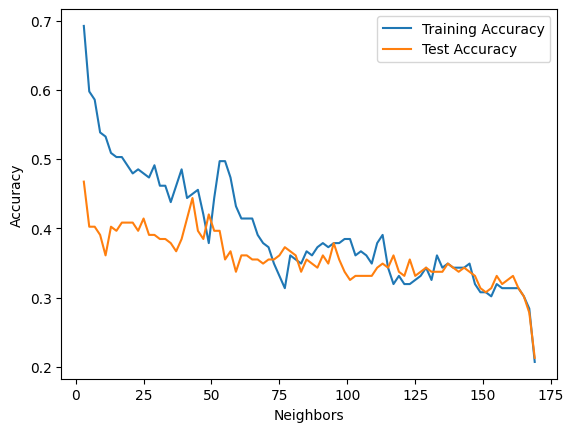

[3]


In [ ]:
### Question 2.3
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
print(len(u_train)) #len is 169
k_grid = np.array([ (2*k+3) for k in range(0,84)])
test_accuracies = []
train_accuracies = []
for k in k_grid:
    model = KNeighborsClassifier(n_neighbors = k)
    model = model.fit(u_train,y_train)
    y_hat = model.predict(u_test)
    test_acc = model.score(u_test,y_test)
    train_acc = model.score(u_train,y_train)
    print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies)
optimal_indices = np.where(is_optimal)
k_optimal = k_grid[optimal_indices]

print(k_optimal)

# k value is 3. k was selected by fitting knn classifiers across the k_grid
# made up of odd values of k. Values of k that are too small overfit
# training data and the larger values underfit, so the k value given
#maximizes test accuracy.

k = int(k_optimal[0])
model = KNeighborsClassifier(n_neighbors = k)
model = model.fit(u_train,y_train)

y_hat = model.predict(u_test)


In [ ]:
### Question 2.4
from sklearn.metrics import accuracy_score
conf = pd.crosstab(y_test,y_hat)
print(conf)
accuracy = accuracy_score(y_test,y_hat)
print(accuracy)

# The confusion matrix demonstrates the mine types cross tabulated
# true values with predicted ones. Overall accuracy is 47%.
# Performance is highest for types 1 and 2 with largest number
# of predictions along the diagnol. Mine types 3,4,5 are more
# misclassified.

col_0       1   2   3  4  5
mine_type                  
1          26   0   4  2  4
2           0  30   2  2  1
3          12   3  10  1  7
4           9   4  10  8  2
5          10   1  14  2  5
0.46745562130177515


### Question 2.5
In this model, mine types 1 and 2 are the most accurate. Thus, the model does not have a high accuracy and should not be used for decision making. It can be used to help verify accurate results from another model. This is because types 3-5 is likely uncertain. Thus, I would likely advise that the model is more accurate for verifying type 1 and 2 but not 3-5. I would also recommend using another model or verification before consulting this model and not to use it as the sole predictor.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
### Question 3.1
cars_df = pd.read_csv('./data/USA_cars_datasets.csv')

# dropping everything except price, year, mileage
cars_df = cars_df.drop(columns = ['Unnamed: 0','brand', 'model', 'title_status', 'color',
                                  'vin', 'lot','state', 'country', 'condition'])

#checking head and dimensions
cars_df.head()
print(cars_df.head())
cars_df.shape
print(cars_df.shape)

#check NAs
cars_df.isna().sum()

# There are no NAs present.

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


,0
price,0
year,0
mileage,0


In [ ]:
### Question 3.2

#minmax scaler
def MinMaxScaler(x):
  u = (x-min(x))/(max(x)-min(x))
  return u
y= cars_df['price']
ctrl_list = ['year', 'mileage']
x= cars_df.loc[:, ctrl_list]
u= x.apply(MinMaxScaler)

In [ ]:
### Question 3.3
from sklearn.model_selection import train_test_split

u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size=.2,
    random_state=100
)

MSE for 3 is 126446573.21822222


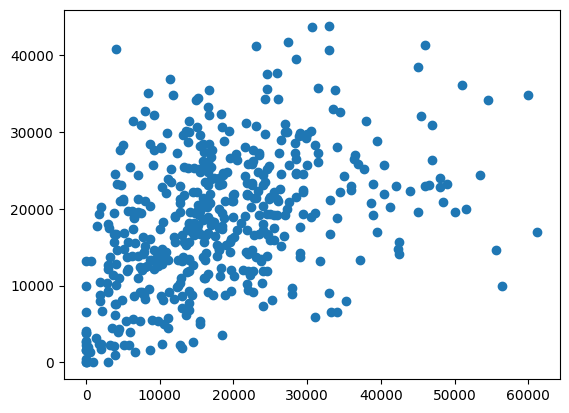

MSE for 10 is 110802185.58681999


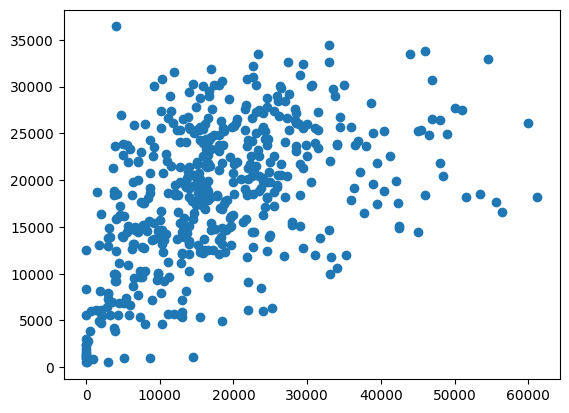

MSE for 25 is 103170457.848608


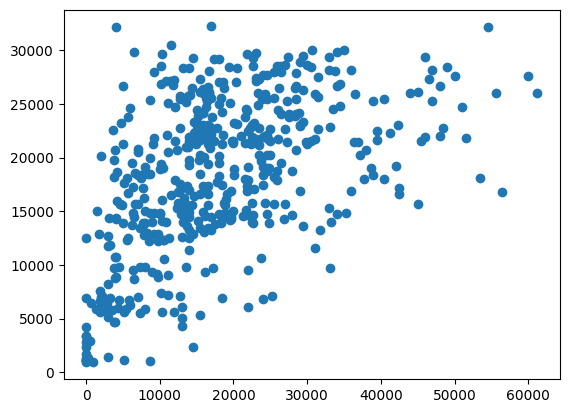

MSE for 50 is 99695443.96419598


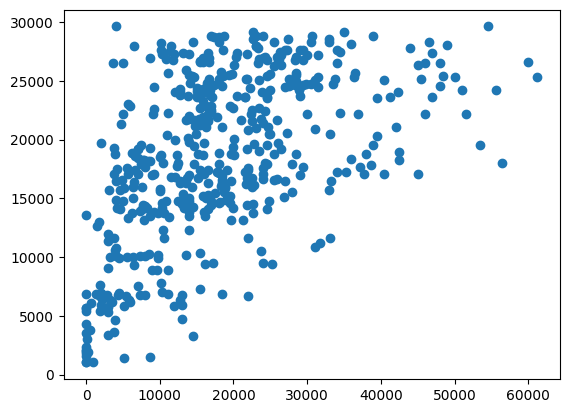

MSE for 100 is 98271058.96092059


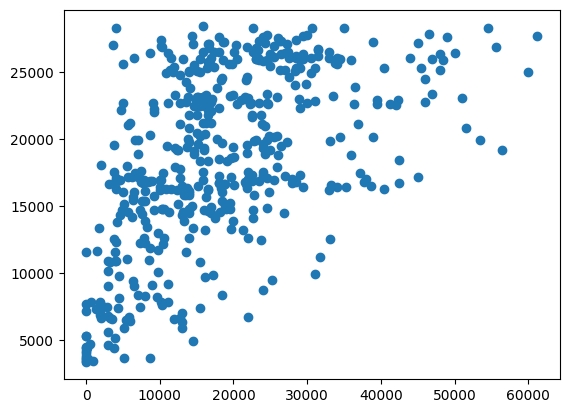

MSE for 300 is 100477298.914212


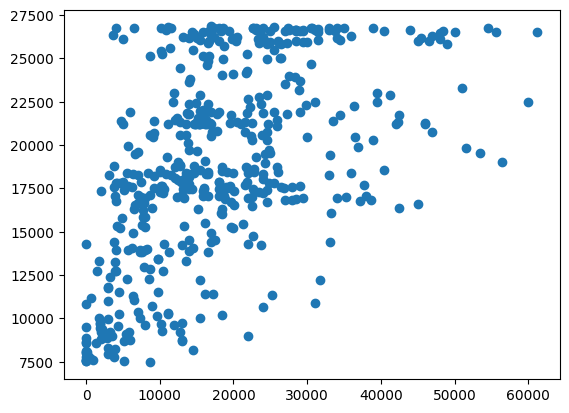

In [ ]:
### Question 3.4

from sklearn.neighbors import KNeighborsRegressor
def mse(y_test,y_hat):
  mse = np.sum( (y_test - y_hat) ** 2 )/len(y_test)
  return mse

k_vals = [3,10,25,50,100,300]
for k in k_vals:
  model = KNeighborsRegressor(n_neighbors=k)
  model = model.fit(u_train,y_train)
  y_hat = model.predict(u_test)
  mse_val = mse(y_test,y_hat)
  print('k value:' ,k ,'MSE:', mse_val)
  plt.scatter(y_test,y_hat)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.show()

# I notice that as k increases, the prices become more consistent with one
# another. The smaller the value of k, the more scattered it seemms in the plots.
# For example when k is 3, the prices are spread out and vary with outliers.
# For k as 300 they are more clustered.

In [ ]:
### Question 3.5
k_grid = [ (2*k+1) for k in range(100) ]
mses = []
for k in k_grid:
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(u_train,y_train)
    y_hat = model.predict(u_test)
    mses.append( mse(y_test, y_hat) )
index_star = np.argmin( mses )
k_star = k_grid[index_star]
print('min mse:', mses[index_star])

print('k_optimal:', k_star)

#The optimal k for this is 77 because MSE is lowest at a value of 97988032.50151458

min mse: 97988032.50151458
k_optimal: 77


# Question 3.6
When k is smaller, the prices seem to be more scattered/more changed from each other. As k increases, they become more consistent with one another. Thus, this indicates overfitting with smaller k values because the model is overly sensitive to the few data points picked. The larger k values demonstrate underfitting because the model is averaging many values and loses the variablity. This is why the optimal value of k is in the middle.


**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [85]:
###Question 5.1
zoo_df = pd.read_csv('./data/zoo.csv')
zoo_df.head()
zoo_df.shape
zoo_df.describe()
#class counts
zoo_df['class'].value_counts()

#variation
print(zoo_df['hair'].describe())
#There is a high variation with std at 0.5.
print(zoo_df['feathers'].describe())
# There is high but less variation with std at 0.4.
print(zoo_df['milk'].describe())
# There is high variation with std at 0.5.
print(zoo_df['eggs'].describe())
# There is high variation with std at 0.5.
print(zoo_df['airborne'].describe())
# There is lower variation with std close to 0.4.

# I think feathers will help determine because birds are most
# likely to have feathers so this would be when feathers is 1.
# Also milk could be a good variable to use since not all
# animals produce milk - this is mostly a mammalian trait.


count    101.000000
mean       0.425743
std        0.496921
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: hair, dtype: float64
count    101.000000
mean       0.198020
std        0.400495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: feathers, dtype: float64
count    101.000000
mean       0.405941
std        0.493522
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: milk, dtype: float64
count    101.000000
mean       0.584158
std        0.495325
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: eggs, dtype: float64
count    101.000000
mean       0.237624
std        0.427750
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: airborne, dtype: float64


In [87]:
### Question 5.2
# Using min max to normalize and 50/50 train test split
# for mine type represented in both sets.

zoo_df = zoo_df.sample(frac=1, random_state = 100).reset_index(drop=True)
test_size = int( .5 * len(zoo_df) )
df_test = zoo_df.iloc[:test_size,:].reset_index(drop=True)
df_train = zoo_df.iloc[test_size:,:].reset_index(drop=True)

Test accuracy for 3 neighbors is 0.9215686274509803; train accuracy for 3 neighbors is 0.98
Test accuracy for 5 neighbors is 0.9019607843137255; train accuracy for 5 neighbors is 0.96
Test accuracy for 7 neighbors is 0.8627450980392157; train accuracy for 7 neighbors is 0.92
Test accuracy for 9 neighbors is 0.8627450980392157; train accuracy for 9 neighbors is 0.9
Test accuracy for 11 neighbors is 0.8627450980392157; train accuracy for 11 neighbors is 0.9
Test accuracy for 13 neighbors is 0.8627450980392157; train accuracy for 13 neighbors is 0.92
Test accuracy for 15 neighbors is 0.8627450980392157; train accuracy for 15 neighbors is 0.92
Test accuracy for 17 neighbors is 0.9019607843137255; train accuracy for 17 neighbors is 0.84
Test accuracy for 19 neighbors is 0.8431372549019608; train accuracy for 19 neighbors is 0.82
Test accuracy for 21 neighbors is 0.803921568627451; train accuracy for 21 neighbors is 0.82
Test accuracy for 23 neighbors is 0.7647058823529411; train accuracy fo

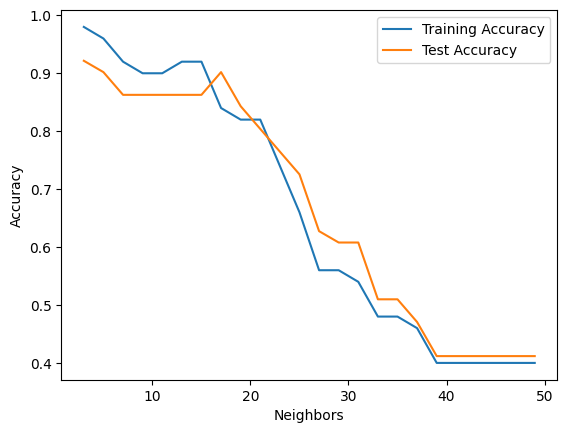

[3]


In [100]:
### Question 5.3
def MinMaxScaler(x):
    return (x - min(x)) / (max(x) - min(x))

ctrl_list = zoo_df.drop(columns=['animal','class']).columns
x = zoo_df.loc[:, ctrl_list]
u = x.apply(MinMaxScaler)

y = zoo_df['class']

u_train, u_test, y_train, y_test = train_test_split(
    u, y,
    test_size=.5,
    random_state=100
)

#picking k
k_grid = np.array([ (2*k+3) for k in range(0,30)])
n_train = len(u_train)
k_grid = k_grid[k_grid <= n_train]
# had to do the two above lines to get rid of error, looked up how to
test_accuracies = []
train_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors = k)
    model = model.fit(u_train,y_train)
    y_hat = model.predict(u_test)
    test_acc = model.score(u_test,y_test)
    train_acc = model.score(u_train,y_train)
    print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# plotting k grid and accuracies

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

#accuracy picking optimal k
is_optimal = test_accuracies == np.max(test_accuracies)
optimal_indices = np.where(is_optimal)
k_optimal = k_grid[optimal_indices]
print(k_optimal)

# Value k was found by fitting knn classifiers across the data.
# The one with the highest accuracy was chosen because this is the one
# tht works best with the model on test data.

In [101]:
### Question 5.4
pd.crosstab(y_test, y_hat)
model.score(u_test, y_test)
# The accuracy is 0.4117647058823529 meaning that the model
# is classifying 41% of the animals correctly. This is close to a
# subpar everage so this means it cannot correctly classify the
# majority of animals due to similar characteristics between them
# in the categories of eggs, milk, feathers, hair, airborne.
# so likely due to this, the mistakes are made across groups.

0.4117647058823529

In [109]:
### Question 5.5
u_train_subset = u_train[features_subset]
u_test_subset  = u_test[features_subset]

model_sub = KNeighborsClassifier(n_neighbors=int(k_optimal[0]))
model_sub = model_sub.fit(u_train_subset, y_train)

y_hat_sub = model_sub.predict(u_test_subset)

pd.crosstab(y_test, y_hat_sub)
model_sub.predict_proba(u_test_subset.values)

# By just using milk, aquatic, and airborne, the model is likely
#only to name some of the classes because some classes may be barely represented
# in the data or not at all.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.66666667],
       [0.        , 0.66666667, 0.        , 0.        , 0.        ,
        0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.66666667],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.66666667],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)